In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import geopandas as gpd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

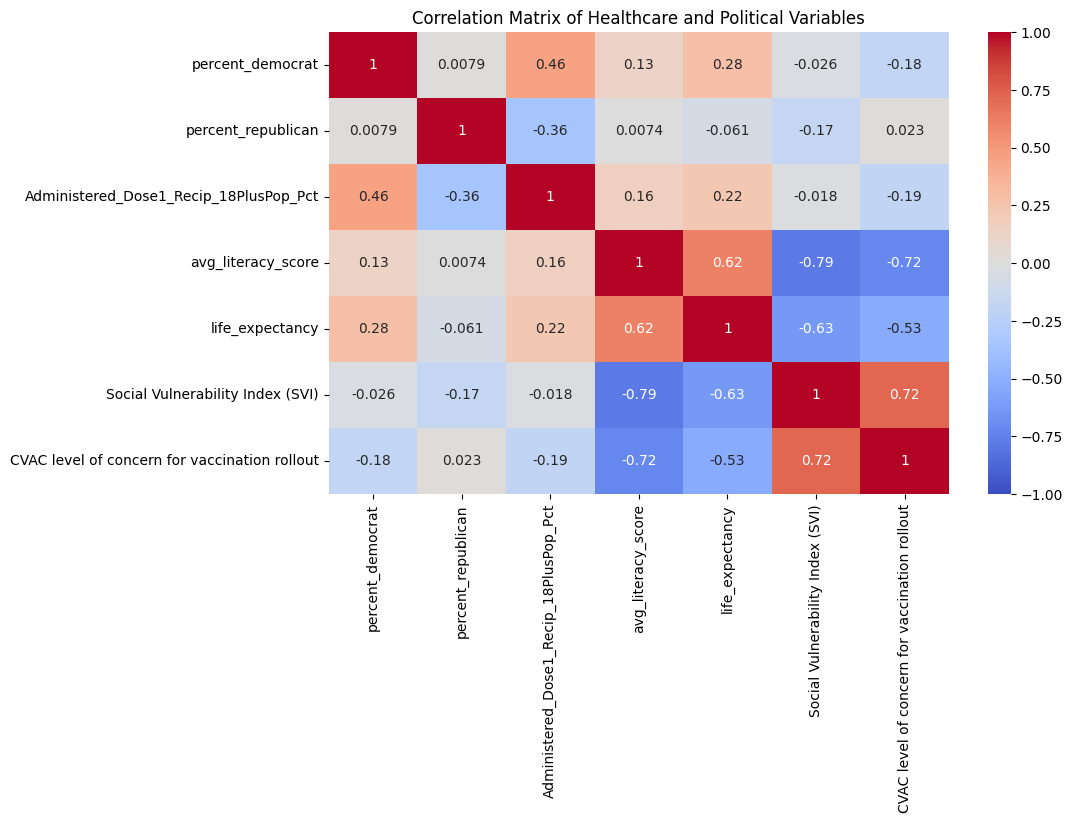

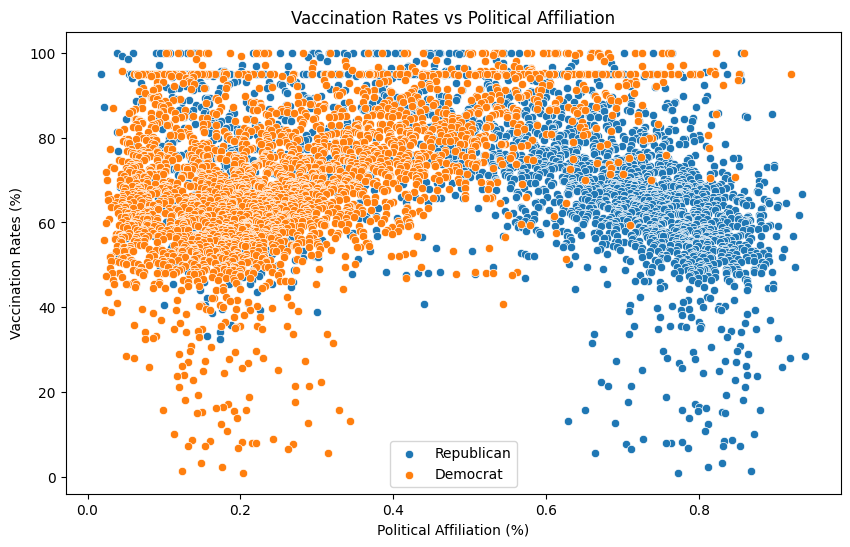

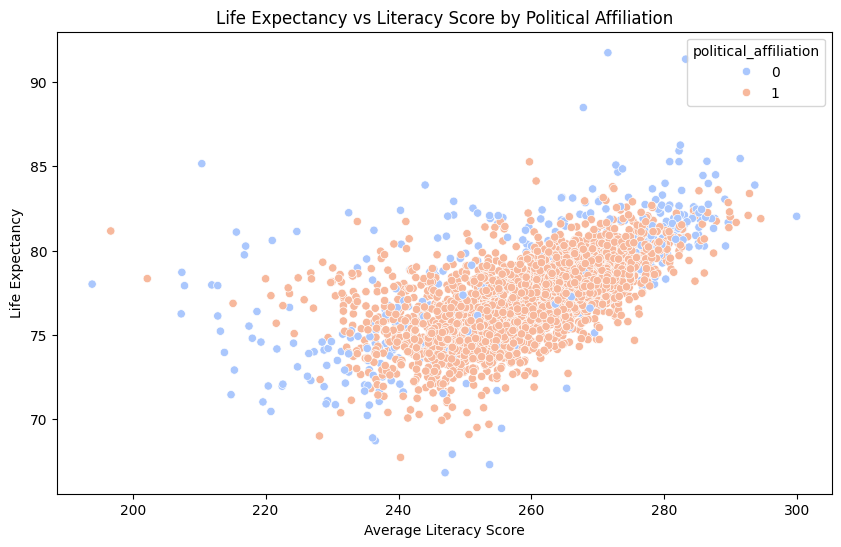

In [4]:
data = pd.read_csv('../data/merged.csv')

# Correlation matrix to explore relationships between healthcare outcomes and political data
corr_matrix = data[['percent_democrat', 'percent_republican', 
                    'Administered_Dose1_Recip_18PlusPop_Pct', 
                    'avg_literacy_score', 'life_expectancy', 
                    'Social Vulnerability Index (SVI)', 
                    'CVAC level of concern for vaccination rollout']].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Healthcare and Political Variables')
plt.show()

# Scatter plot to visualize the relationship between political affiliation and vaccination rates
plt.figure(figsize=(10, 6))
sns.scatterplot(x='percent_republican', y='Administered_Dose1_Recip_18PlusPop_Pct', data=data, label='Republican')
sns.scatterplot(x='percent_democrat', y='Administered_Dose1_Recip_18PlusPop_Pct', data=data, label='Democrat')
plt.title('Vaccination Rates vs Political Affiliation')
plt.xlabel('Political Affiliation (%)')
plt.ylabel('Vaccination Rates (%)')
plt.legend()
plt.show()

# Scatter plot of life expectancy vs literacy score, colored by political affiliation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_literacy_score', y='life_expectancy', hue='political_affiliation', data=data, palette='coolwarm')
plt.title('Life Expectancy vs Literacy Score by Political Affiliation')
plt.xlabel('Average Literacy Score')
plt.ylabel('Life Expectancy')
plt.show()



/tmp/ipykernel_5051/3478757500.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vaccination_correlations.index, y=top_vaccination_correlations.values, palette='coolwarm')


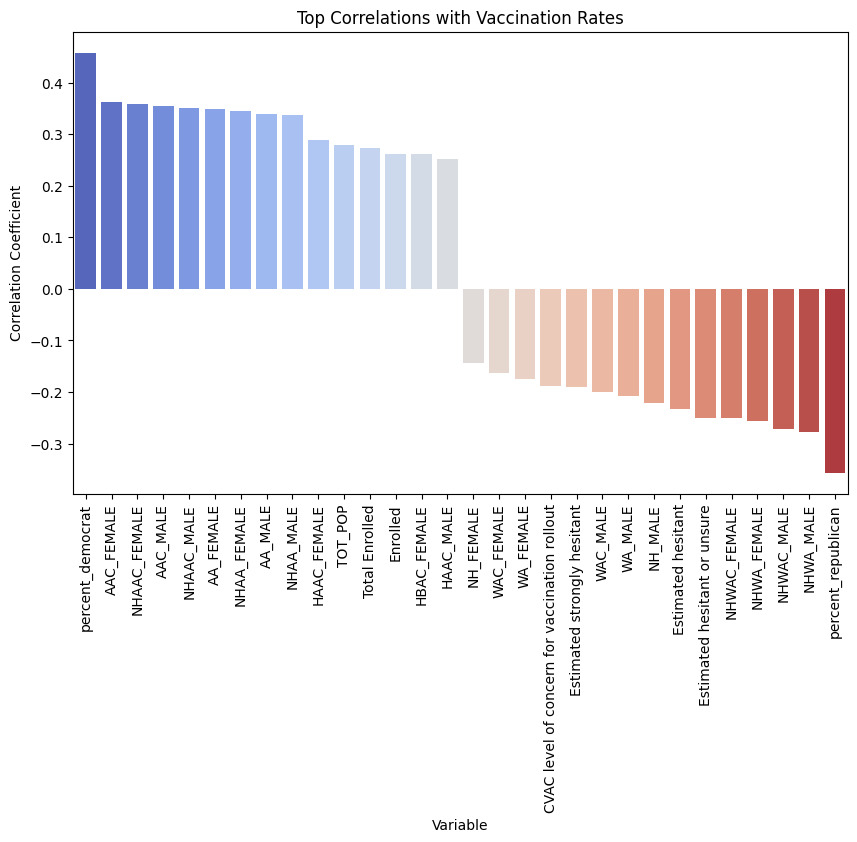

In [30]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix_numerical = numerical_data.corr()

vaccination_correlations = correlation_matrix_numerical['Administered_Dose1_Recip_18PlusPop_Pct'].sort_values(ascending=False)

# Get the top correlations with vaccination rates (both positive and negative)
top_vaccination_correlations = pd.concat([vaccination_correlations.iloc[1:16], vaccination_correlations.iloc[-16:-1]])

plt.figure(figsize=(10, 6))
sns.barplot(x=top_vaccination_correlations.index, y=top_vaccination_correlations.values, palette='coolwarm')
plt.title('Top Correlations with Vaccination Rates')
plt.xlabel('Variable')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()

In [6]:
# Selecting relevant features for prediction of vaccination rates and life expectancy
X_vaccine = data[['percent_democrat', 'percent_republican', 'avg_literacy_score', 'life_expectancy', 'Social Vulnerability Index (SVI)']]
y_vaccine = data['Administered_Dose1_Recip_18PlusPop_Pct']

X_life_expectancy = data[['percent_democrat', 'percent_republican', 'avg_literacy_score', 'Social Vulnerability Index (SVI)', 'Administered_Dose1_Recip_18PlusPop_Pct']]
y_life_expectancy = data['life_expectancy']

# Splitting the data into training and testing sets
X_vaccine_train, X_vaccine_test, y_vaccine_train, y_vaccine_test = train_test_split(X_vaccine, y_vaccine, test_size=0.2, random_state=42)
X_life_expectancy_train, X_life_expectancy_test, y_life_expectancy_train, y_life_expectancy_test = train_test_split(X_life_expectancy, y_life_expectancy, test_size=0.2, random_state=42)

# Linear Regression Model for Vaccination Rates
vaccine_model = LinearRegression()
vaccine_model.fit(X_vaccine_train, y_vaccine_train)

# Predicting and evaluating the vaccine model
y_vaccine_pred = vaccine_model.predict(X_vaccine_test)
vaccine_rmse = mean_squared_error(y_vaccine_test, y_vaccine_pred, squared=False)
vaccine_r2 = r2_score(y_vaccine_test, y_vaccine_pred)

# Linear Regression Model for Life Expectancy
life_expectancy_model = LinearRegression()
life_expectancy_model.fit(X_life_expectancy_train, y_life_expectancy_train)

# Predicting and evaluating the life expectancy model
y_life_expectancy_pred = life_expectancy_model.predict(X_life_expectancy_test)
life_expectancy_rmse = mean_squared_error(y_life_expectancy_test, y_life_expectancy_pred, squared=False)
life_expectancy_r2 = r2_score(y_life_expectancy_test, y_life_expectancy_pred)

# Output evaluation results
(vaccine_rmse, vaccine_r2, life_expectancy_rmse, life_expectancy_r2)

/home/arnav/Desktop/syn/syn100-project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/arnav/Desktop/syn/syn100-project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(np.float64(13.167434723047599),
 0.36396905650799194,
 np.float64(1.8479632615956085),
 0.5089057392543397)

In [ ]:
"""
The factors are a solid predictor for life expectancy, but spread is too large for predicting vaccination percent. 

Try using random forest model instead of linear regression?
"""

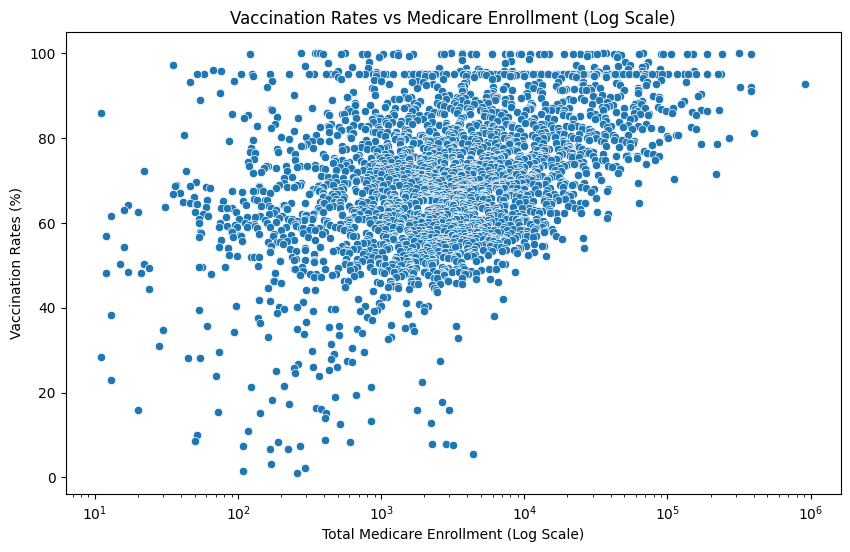

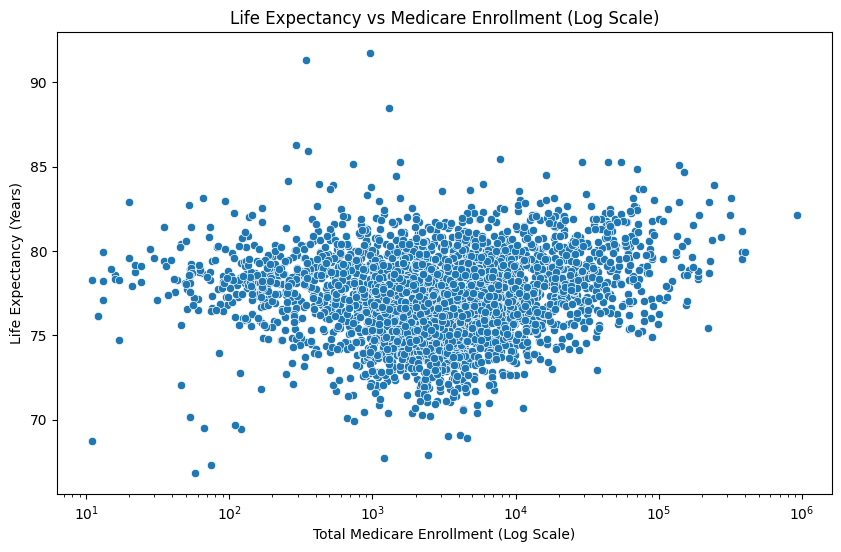

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Enrolled', y='Administered_Dose1_Recip_18PlusPop_Pct', data=data)
plt.xscale('log')
plt.title('Vaccination Rates vs Medicare Enrollment (Log Scale)')
plt.xlabel('Total Medicare Enrollment (Log Scale)')
plt.ylabel('Vaccination Rates (%)')
plt.show()

# Scatter plot showing the relationship between Medicare Enrollment (log scale) and Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Enrolled', y='life_expectancy', data=data)
plt.xscale('log')
plt.title('Life Expectancy vs Medicare Enrollment (Log Scale)')
plt.xlabel('Total Medicare Enrollment (Log Scale)')
plt.ylabel('Life Expectancy (Years)')
plt.show()

In [10]:
# Selecting relevant features including Medicare and Demographic data
X_combined = data[['percent_democrat', 'percent_republican', 'avg_literacy_score', 
                   'life_expectancy', 'Social Vulnerability Index (SVI)', 
                   'Total Enrolled', 'PROP_MALE', 'PROP_FEMALE']]

y_vaccine = data['Administered_Dose1_Recip_18PlusPop_Pct']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_vaccine, test_size=0.2, random_state=42)

# Applying Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}, R²: {r2}")

RMSE: 12.455164149532646, R²: 0.43091805381865744


/home/arnav/Desktop/syn/syn100-project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


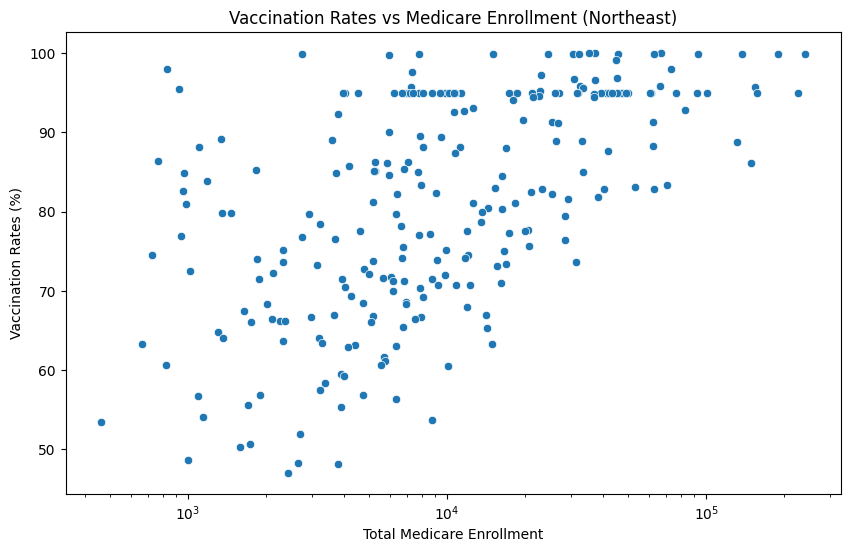

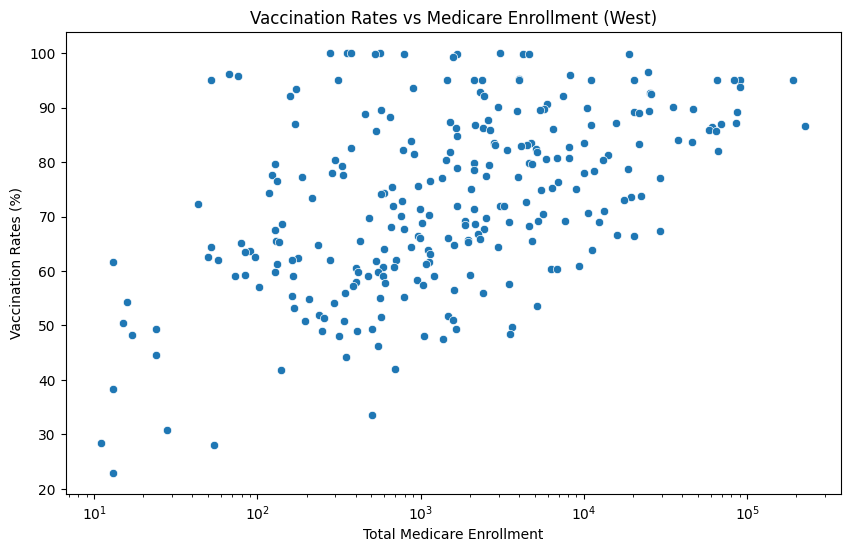

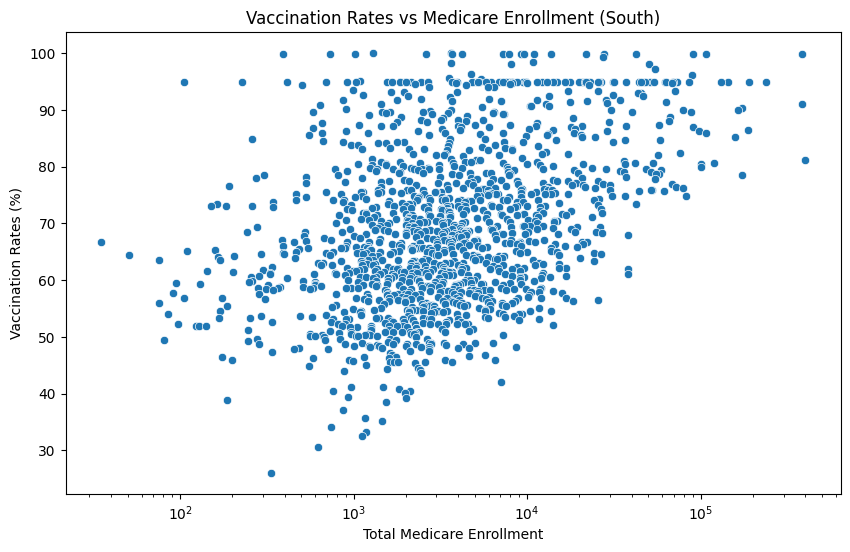

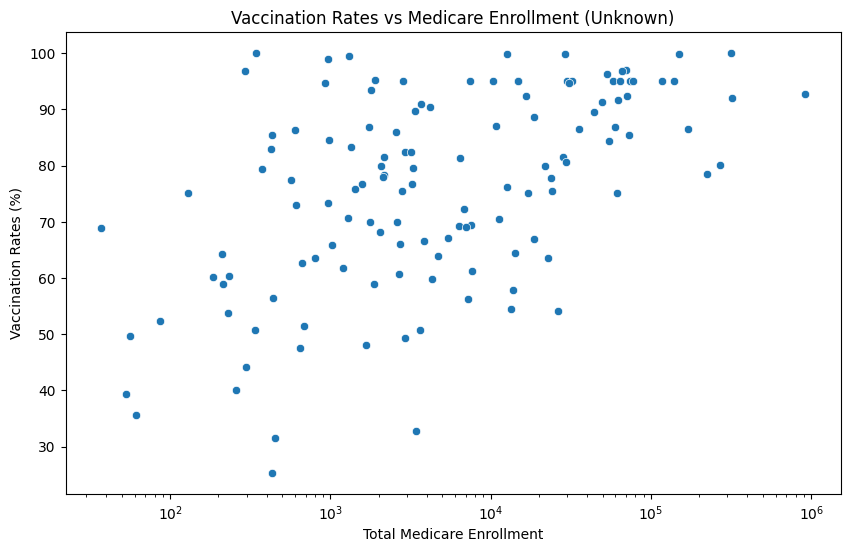

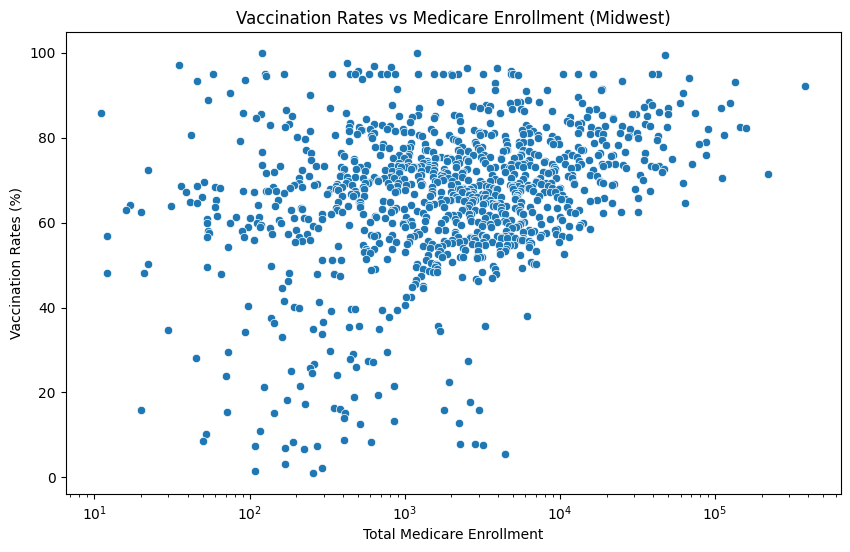

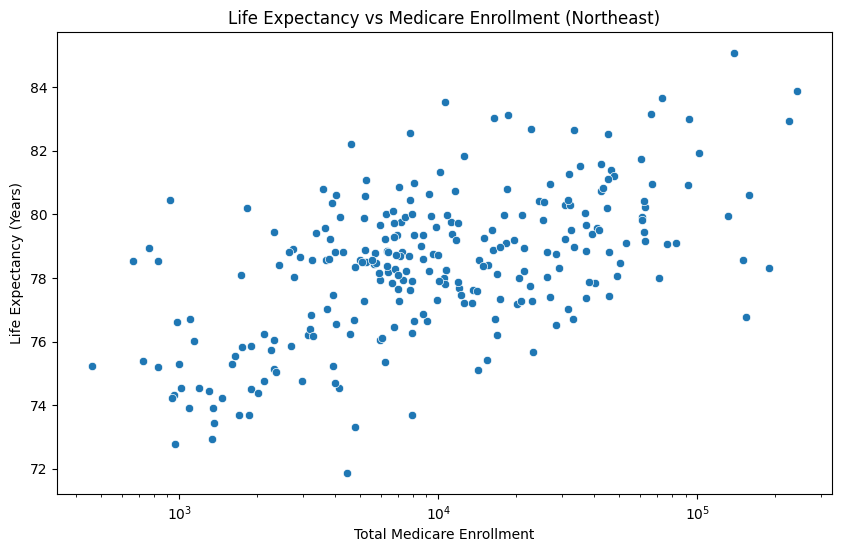

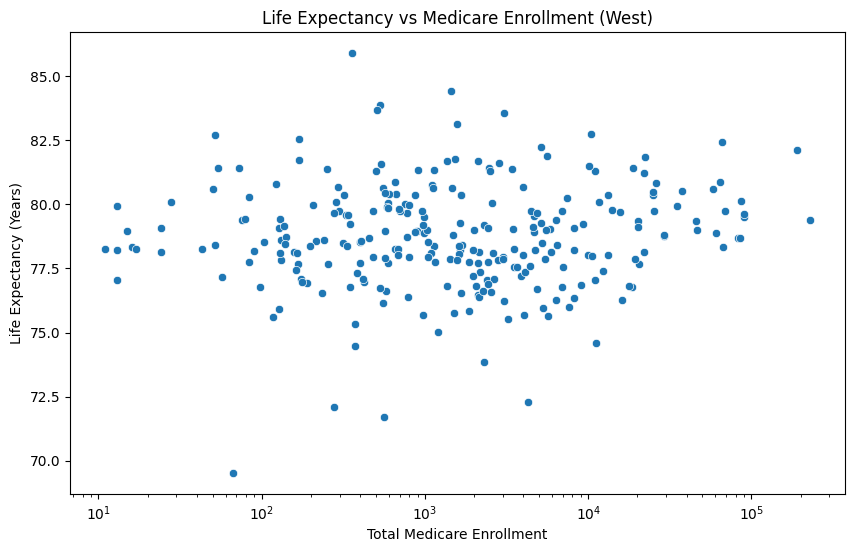

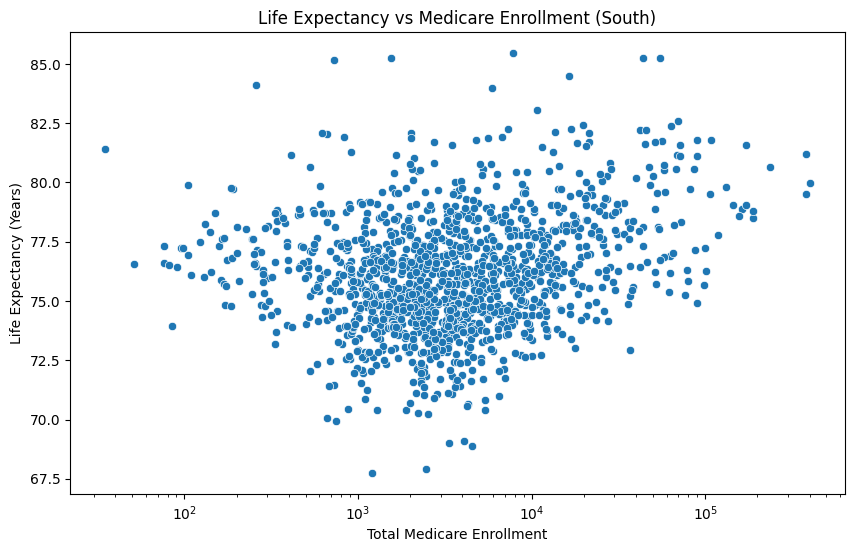

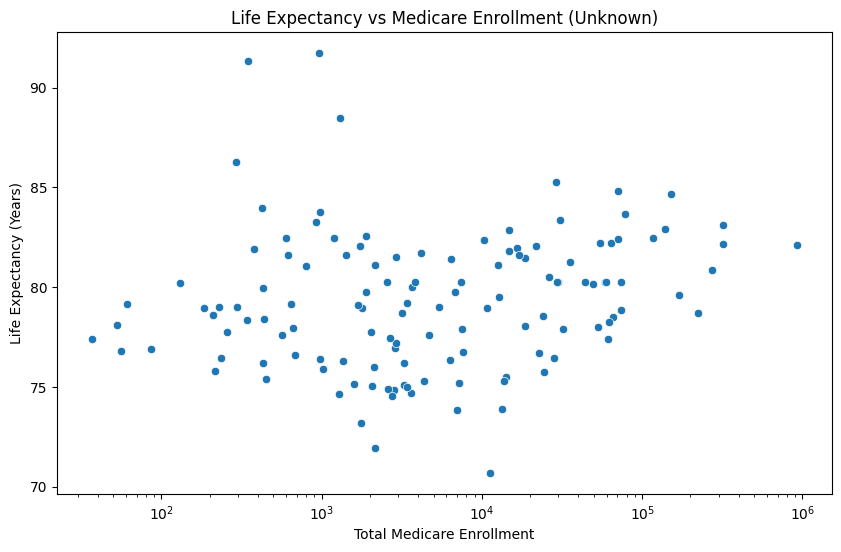

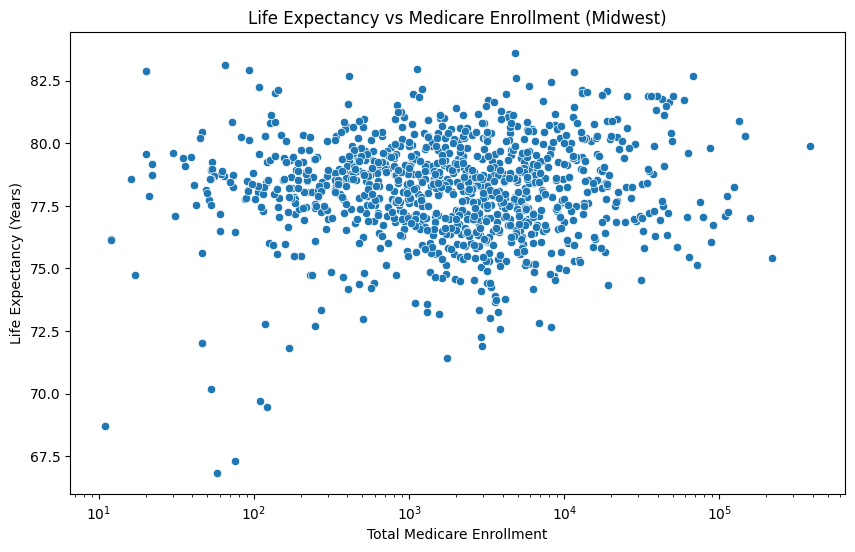

In [16]:
# Scatter plot of Vaccination Rates vs Medicare Enrollment for each Region
regions = data['Region'].unique()

for region in regions:
    regional_data = data[data['Region'] == region]
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Total Enrolled', y='Administered_Dose1_Recip_18PlusPop_Pct', data=regional_data)
    plt.title(f'Vaccination Rates vs Medicare Enrollment ({region})')
    plt.xlabel('Total Medicare Enrollment')
    plt.xscale('log')
    plt.ylabel('Vaccination Rates (%)')
    plt.show()

# Scatter plot of Life Expectancy vs Medicare Enrollment for each Region
for region in regions:
    regional_data = data[data['Region'] == region]
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Total Enrolled', y='life_expectancy', data=regional_data)
    plt.title(f'Life Expectancy vs Medicare Enrollment ({region})')
    plt.xlabel('Total Medicare Enrollment')
    plt.xscale('log')
    plt.ylabel('Life Expectancy (Years)')
    plt.show()

In [32]:
# Select relevant numerical features for PCA
pca_features = data.select_dtypes(include=['float64', 'int64']).dropna()

# Standardize the data
scaler = StandardScaler()
pca_features_scaled = scaler.fit_transform(pca_features)

# Initialize PCA and fit the data
pca = PCA(n_components=5)  # Using 5 components for demonstration
pca.fit(pca_features_scaled)

# Extract the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Get the principal components (eigenvectors)
principal_components = pca.components_

# Convert principal components to a DataFrame for easier interpretation
pca_df = pd.DataFrame(principal_components, columns=pca_features.columns, index=[f'PC{i+1}' for i in range(5)])

# Display the explained variance and principal components
explained_variance, pca_df

(array([0.25823643, 0.16320125, 0.12155838, 0.10757117, 0.0743123 ]),
          FIPS  percent_democrat  percent_republican  \
 PC1  0.005168         -0.073355            0.078661   
 PC2 -0.040979         -0.007037           -0.097301   
 PC3  0.031608         -0.044625            0.019831   
 PC4  0.016646         -0.061328            0.088623   
 PC5 -0.067218         -0.120812            0.000713   
 
      Administered_Dose1_Recip_18PlusPop_Pct  avg_literacy_score  \
 PC1                               -0.077542            0.056342   
 PC2                               -0.007253           -0.122241   
 PC3                               -0.017584           -0.055254   
 PC4                               -0.073289           -0.186975   
 PC5                               -0.085476           -0.066599   
 
      life_expectancy   TOT_POP  PROP_MALE  PROP_FEMALE   WA_MALE  ...  \
 PC1        -0.029651 -0.095449   0.005456    -0.005456  0.097417  ...   
 PC2        -0.140127 -0.014998  -

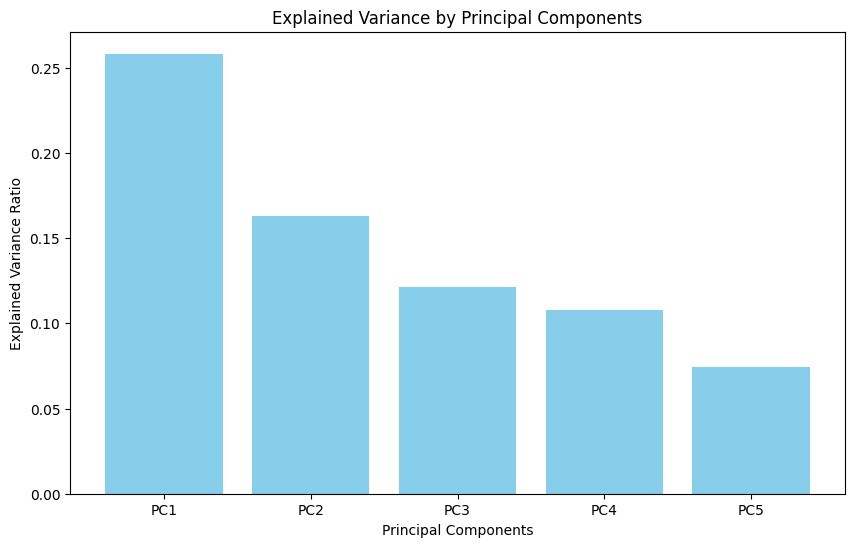

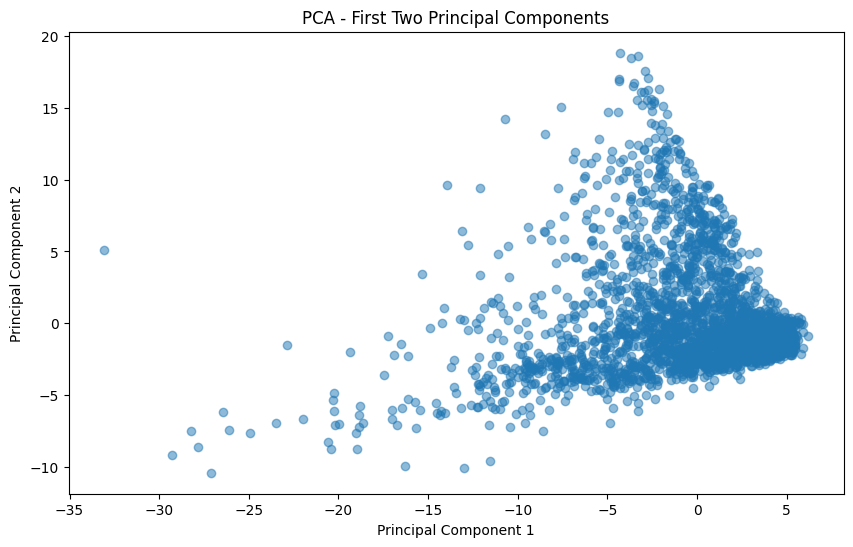

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(x=[f'PC{i+1}' for i in range(5)], height=explained_variance, color='skyblue')
plt.title('Explained Variance by Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.show()


pca_2d = PCA(n_components=2)
pca_2d_results = pca_2d.fit_transform(pca_features_scaled)

# Plotting the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_2d_results[:, 0], pca_2d_results[:, 1], alpha=0.5)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [39]:
loadings = pca_df.loc[['PC1', 'PC2']].abs()

# Get the top 5 features for each principal component based on loadings
top_features_pc1 = loadings.loc['PC1'].sort_values(ascending=False).head(5)
top_features_pc2 = loadings.loc['PC2'].sort_values(ascending=False).head(5)

top_features_pc1, top_features_pc2 # demographic data playing largest parts in 

(NHWA_MALE       0.172669
 NHWA_FEMALE     0.171735
 NHWAC_MALE      0.170753
 NHWAC_FEMALE    0.169757
 HAAC_FEMALE     0.169577
 Name: PC1, dtype: float64,
 NHBA_FEMALE     0.241909
 NHBAC_FEMALE    0.241612
 NHBA_MALE       0.240884
 NHBAC_MALE      0.240637
 BA_FEMALE       0.240494
 Name: PC2, dtype: float64)